여행지 선정하기 1
----

여행을 좋아하는 익중이는 여행지를 알아보고 있습니다. 

주어진 데이터에는 총 몇 개의 도시와 몇 개의 나라가 있는지 알아맞혀 보세요.



In [1]:
import pandas as pd

df = pd.read_csv('data/world_cities.csv', index_col = 0)

# df['City / Urban area'].value_counts().shape

df['City / Urban area'].describe()

count              249
unique             249
top       Phoenix/Mesa
freq                 1
Name: City / Urban area, dtype: object

In [2]:
# df['Country'].value_counts().shape

df['Country'].describe()

count     249
unique     61
top       USA
freq      105
Name: Country, dtype: object

사람 만나기를 좋아하는 익중이는 가장 사람이 붐비는 도시로 여행을 가기로 마음 먹었습니다. 

주어진 데이터에서, 인구 밀도(명/sqKm) 가 10000 이 넘는 도시는 총 몇 개인지 알아보세요.


참고로 인구 밀도는 인구 수 / 땅의 면적 (in sqKm) 로 구할 수 있습니다.

In [3]:
# cond = (df['Population'] / df['Land area (in sqKm)']) > 10000
# cond.value_counts()

df['Density'] = (df['Population'] / df['Land area (in sqKm)'])
df_density = df[df['Density'] > 10000]
df_density.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 32 to 129
Data columns (total 5 columns):
City / Urban area      19 non-null object
Country                19 non-null object
Population             19 non-null int64
Land area (in sqKm)    19 non-null int64
Density                19 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 912.0+ bytes


이번에는 인구 밀도가 가장 높은 도시를 찾아봅시다.



In [4]:
df.sort_values(by='Density', ascending=False)
df.head(1)['City / Urban area']

0    Buenos Aires
Name: City / Urban area, dtype: object

여행지 선정하기 2
----
익중이는 누나에게 여행지를 추천 받으려고 합니다.

그런데 나라 이름이 기억나지 않고, 이 데이터에 4개의 도시가 나왔다는 것만 기억이 난다고 하네요.

이 나라는 무엇일까요?


In [7]:
import pandas as pd

df = pd.read_csv('data/world_cities.csv')

cond = df['Country'].value_counts()
print(cond)
cond[cond == 4]

USA           105
France         15
Brazil         10
Canada          9
Germany         8
             ... 
Ukraine         1
Saudi           1
Nigeria         1
Azerbaijan      1
Chile           1
Name: Country, Length: 61, dtype: int64


Italy    4
Name: Country, dtype: int64

**```df['Country'].value_counts() == 4```** 는 Country마다 True, False값이 들어가 있기 때문에 

**```df.loc[]```** 의 조건으로 사용할 수 없습니다 

(**df의 인덱스는 숫자**, **조건의 인덱스는 Country**이고 서로 길이가 다르기 때문에 인덱스가 매칭이 안됩니다). 


**```df['Population']/df['Land area (in sqKm)'] > 10000```** 은 df와 똑같은 인덱스를 가지고 있기 때문에 잘 실행됩니다.

수강신청 준비하기
----
2,000명의 코드잇 대학교 학생들이 수강신청을 했습니다.


수강신청에는 다음 3개의 조건이 있습니다.

1. “information technology” 과목은 심화과목이라 1학년은 수강할 수 없습니다.

2. “commerce” 과목은 기초과목이고 많은 학생들이 듣는 수업이라 4학년은 수강할 수 없습니다.

3. 수강생이 5명이 되지 않으면 강의는 폐강되어 수강할 수 없습니다.

기존 DataFrame에 “status”라는 이름의 column을 추가하고, 학생이 수강 가능한 상태이면 “allowed”, 수강 불가능한 상태이면 “not allowed”를 넣어주세요.


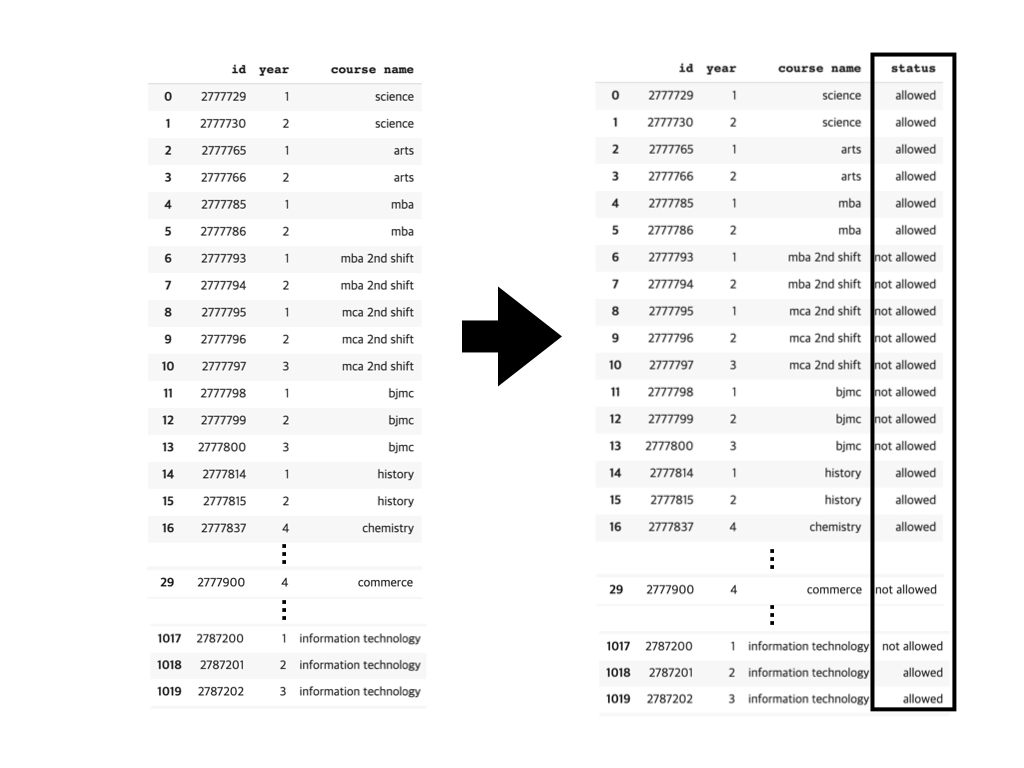


In [79]:
import pandas as pd

df = pd.read_csv('data/enrolment_1.csv')

df['status'] = 'allowed'

cond = (df['course name'] == 'information technology') & (df['year'] == 1)
cond2 = (df['course name'] == 'commerce') & (df['year'] == 4)
cond3 = df['course name'].value_counts() < 5

cond3_1 = cond3[cond3]  # 인덱스가 course name 이기에 위의 조건이랑 합치지 못함
cond3_2 = list((cond3_1.index)) # 그래서 index인 course name 을 리스트화 

cond = cond | cond2
df.loc[cond, 'status'] = 'not allowed'


for i in cond3_2: # for문을 돌면서 하나씩 변경
    df.loc[df['course name'] == i, 'status'] = 'not allowed'

df

,id,year,course name,status
0,2777729,1,science,allowed
1,2777730,2,science,allowed
2,2777765,1,arts,allowed
3,2777766,2,arts,allowed
4,2777785,1,mba,allowed
...,...,...,...,...
1995,2796805,3,computer application,allowed
1996,2796812,1,nursing,allowed
1997,2796813,2,nursing,allowed
1998,2796814,3,nursing,allowed
